<a target="_blank" href="https://colab.research.google.com/github/rohand2290/find-orthologs/blob/main/find_orthologs.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Importing required modules
We require:
* `pandas` for reading CSV files and working with `DataFrame`s
* `asyncio, aiohttp` for making multiple requests at a time to Uniprot's REST API
* `py4cytoscape` for interacting with Cytoscape in a programmatic manner
* `time` for allowing the renderer to exist

In [1]:
import pandas as pd
import asyncio
import aiohttp
import py4cytoscape as p4c
import time

# Read CSV files

In [2]:
df_2019 = pd.read_csv("spreadsheets/2019.csv")
df_2020 = pd.read_csv("spreadsheets/2020.csv")
df_2021 = pd.read_csv("spreadsheets/2021.csv")
df_2023 = pd.read_csv("spreadsheets/2023.csv")

In [4]:
df_2019.head()

,Biological sample name,Protein name,Protein accession numbers,Protein molecular weight (Da),Protein identification probability,Exclusive unique peptide count,Exclusive unique spectrum count,Exclusive spectrum count,Percentage of total spectra,Peptide sequence,Previous amino acid,Next amino acid,Best Peptide identification probability,Best Peptide Score,Calculated +1H Peptide Mass (AMU),Median Retention Time,Total TIC,Peptide start index,Peptide stop index
0,POSITIVE 1,Alpha-enolase OS=Mus musculus GN=Eno1 PE=1 SV=3,ENOA_MOUSE,"47,141.70",100.00%,2,3,8,0.15%,SCNCLLLK,K,V,99.00%,55.8,"1,462.65","2,566.54",966955,336,343
1,POSITIVE 1,Alpha-enolase OS=Mus musculus GN=Eno1 PE=1 SV=3,ENOA_MOUSE,"47,141.70",100.00%,2,3,8,0.15%,VNQIGSVTESLQACK,K,L,99.70%,60.4,"2,020.94","2,093.62",1954540,344,358
2,POSITIVE 1,Ras-related C3 botulinum toxin substrate 1 OS=...,RAC1_MOUSE,"21,450.60",100.00%,3,4,6,0.11%,AVLCPPPVK,R,K,99.70%,48.1,"1,367.68","1,799.46",1956340,175,183
3,POSITIVE 1,Ras-related C3 botulinum toxin substrate 1 OS=...,RAC1_MOUSE,"21,450.60",100.00%,3,4,6,0.11%,AVLCPPPVKK,R,R,99.70%,43.8,"1,495.78","1,332.22",1702820,175,184
4,POSITIVE 1,Ras-related C3 botulinum toxin substrate 1 OS=...,RAC1_MOUSE,"21,450.60",100.00%,3,4,6,0.11%,HHCPNTPIILVGTK,R,L,99.70%,42.5,"1,973.97","1,703.40",1213650,103,116


In [5]:
df_2020.head()

,Unnamed: 0,Accession #,Uniprot ID,Gene,Protein Name,Peptide,E1 RH/L,E2 RH/L
0,1,P08113,sp|P08113|ENPL_MOUSE,Hsp90b1,Endoplasmin OS=Mus musculus GN=Hsp90b1 PE=1 SV=2,LTESPCALVASQYGWSGNMER,0.518676,0.477851579
1,2,Q64514,sp|Q64514|TPP2_MOUSE,Tpp2,Tripeptidyl-peptidase 2 OS=Mus musculus GN=Tpp...,YEDLAPCITLK,0.673939,0.500025001
2,3,Q99KC8,sp|Q99KC8|VMA5A_MOUSE,Vwa5a,von Willebrand factor A domain-containing prot...,SACSAIQK,0.648595,0.68310677
3,4,Q8BRK8,sp|Q8BRK8|AAPK2_MOUSE,Prkaa2,5'-AMP-activated protein kinase catalytic subu...,SCSAAGLHR,1.191859,0.824527687
4,5,P53702,sp|P53702|CCHL_MOUSE,Hccs,Cytochrome c-type heme lyase OS=Mus musculus G...,AYDYVECPVTGAR,0.465523,0.869414015


In [6]:
df_2021.head()

,Unnamed: 0,Accession #,Uniprot ID,Gene,Protein Name,Peptide,E1 RH/L,E2 RH/La
0,1,Q80W21;P19639;P15626;O35660,sp|Q80W21|GSTM7_MOUSE,Gstm7;Gstm3;Gstm2;Gstm6,Glutathione S-transferase Mu 7;Glutathione S-t...,HNLCGETEEER,0.704065,0.066725616
1,2,P42859,sp|P42859|HD_MOUSE,Htt,Huntingtin,CDQGQADPVVAVAR,0.713781,0.406964098
2,3,P11370,sp|P11370|ENV2_MOUSE,Fv4,Retrovirus-related Env polyprotein from Fv-4 l...,CNTAWNR,0.837311,0.537345513
3,4,P05064;P05063,sp|P05064|ALDOA_MOUSE,Aldoa;Aldoc,Fructose-bisphosphate aldolase A;Fructose-bisp...,CQYVTEK,0.848033,0.557444674
4,5,Q8BZH0,sp|Q8BZH0|S39AD_MOUSE,Slc39a13,Zinc transporter ZIP13,SLGAAAACR,0.681401,0.618161587


In [7]:
df_2023.head()

,Accession Number,Gene Name,Protein Name,Peptide,Start Position,End Position,Median,CV
0,Q8VHX6,Flnc,Filamin-C,AGEAATFTVDCSEAGEAELTIEILSDAGVK,1171.0,1200.0,3.6739,0.057847
1,F6ZGI7;Q9Z224,Mocs2,Molybdopterin synthase sulfur carrier subunit,CQIDVLYFAK,5.0,14.0,2.7175,0.200106
2,P30999;D3Z2H7;E9Q986;E9Q8Z6;E9Q8Z5;G3X9V2;E9Q9...,Ctnnd1,Catenin delta-1,TPAILEASAGAIQNLCAGR,677.0,695.0,2.5197,0.307772
3,Q8BFR5;A0A0U1RNQ6,Tufm,"Elongation factor Tu, mitochondrial",GEETPVIVGSALCALEQR,210.0,227.0,2.2456,0.079496
4,E9Q6R7,Utrn,Utrophin,HPQLDCVFTLAQNLK,2278.0,2292.0,1.7226,0.036010


# Formatting function, cleaning data
Now we define a `format_to_human` function that takes a string and replaces MOUSE with HUMAN. 
This is acceptable in most cases, but for 2023 we're going to have to query Uniprot to find the accession numbers in the PROTEIN_HUMAN format. 
We additionally start creating our lists that we'll feed into Cytoscape later.

In [8]:
def format_to_human(acc_num):
    return acc_num.replace("MOUSE", "HUMAN")

acc_col = df_2019["Protein accession numbers"]
acc_col = acc_col.str.split(",")
acc_col = acc_col.explode().reset_index(drop=True)
acc_col = acc_col.map(format_to_human)
acc_col

0        ENOA_HUMAN
1        ENOA_HUMAN
2        RAC1_HUMAN
3        RAC1_HUMAN
4        RAC1_HUMAN
           ...     
5503    PABP1_HUMAN
5504     RPN1_HUMAN
5505    ACTN1_HUMAN
5506    PRDX1_HUMAN
5507     SYWC_HUMAN
Name: Protein accession numbers, Length: 5508, dtype: object

In [9]:
acc_col_2020 = df_2020["Uniprot ID"].str.split("|").str.get(2)
acc_col_2020 = acc_col_2020.str.split(",")
acc_col_2020 = acc_col_2020.explode().reset_index(drop=True)
acc_col_2020 = acc_col_2020.map(format_to_human)
acc_col_2020


0        ENPL_HUMAN
1        TPP2_HUMAN
2       VMA5A_HUMAN
3       AAPK2_HUMAN
4        CCHL_HUMAN
           ...     
1393    SPTN1_HUMAN
1394    NPA1P_HUMAN
1395     SNX1_HUMAN
1396    CASP7_HUMAN
1397    LRC59_HUMAN
Name: Uniprot ID, Length: 1398, dtype: object

In [10]:
acc_col_2021 = df_2021["Uniprot ID"].str.split("|").str.get(2)
acc_col_2021 = acc_col_2021.str.split(",")
acc_col_2021 = acc_col_2021.explode().reset_index(drop=True)
acc_col_2021 = acc_col_2021.dropna()
acc_col_2021 = acc_col_2021.map(format_to_human)
acc_col_2021

0      GSTM7_HUMAN
1         HD_HUMAN
2       ENV2_HUMAN
3      ALDOA_HUMAN
4      S39AD_HUMAN
          ...     
244     TWF2_HUMAN
245    CLIC1_HUMAN
246    SUCB1_HUMAN
247    TF2H1_HUMAN
248    COMD7_HUMAN
Name: Uniprot ID, Length: 249, dtype: object

# Special asynchronous code
This uses Python's async await functionality for multiple requests.
I tried using the `requests` module, but given that 2023 has over 6000 protein entries, it would take an enormous amount of time and resources to query Uniprot for every number.
`aiohttp` and `asyncio` are used here instead to create a batch of 100 requests each time and create the list from there.

In [19]:
acc_col_2023 = df_2023["Accession Number"].str.split(";")
acc_col_2023 = acc_col_2023.dropna()

acc_col_2023 = acc_col_2023.explode().reset_index(drop=True)

async def id_to_num(session, id):
    url = f"https://rest.uniprot.org/uniprotkb/{id}.json"
    try:
        async with session.get(url) as resp:
            if resp.status == 200:
                data = await resp.json()
                return data.get("uniProtkbId")
    except Exception:
        return None

async def fetch_all(ids, batch_size=100):
    results = []
    connector = aiohttp.TCPConnector(limit=batch_size)
    async with aiohttp.ClientSession(connector=connector) as session:
        tasks = [id_to_num(session, id) for id in ids]
        for f in asyncio.as_completed(tasks):
            result = await f
            results.append(result)
    return results


acc_col_2023 = acc_col_2023.drop(6031)
ids = list(acc_col_2023)

results = await fetch_all(ids, batch_size=50)

acc_col_2023 = pd.Series(results)


In [24]:
acc_col_2023 = acc_col_2023.dropna()
acc_col_2023 = acc_col_2023.map(format_to_human)

In [28]:
acc_col.to_csv("acc_col_2019.csv", index=False)
acc_col_2020.to_csv("acc_col_2020.csv", index=False)
acc_col_2021.to_csv("acc_col_2021.csv", index=False)
acc_col_2023.to_csv("acc_col_2023.csv", index=False)

# Testing Cytoscape
Now that we have the CSV's of the human orthologs, it's time to test Cytoscape.
We'll create a demo network with some mock data and show the image.

You are connected to Cytoscape!
Applying default style...
Applying preferred layout


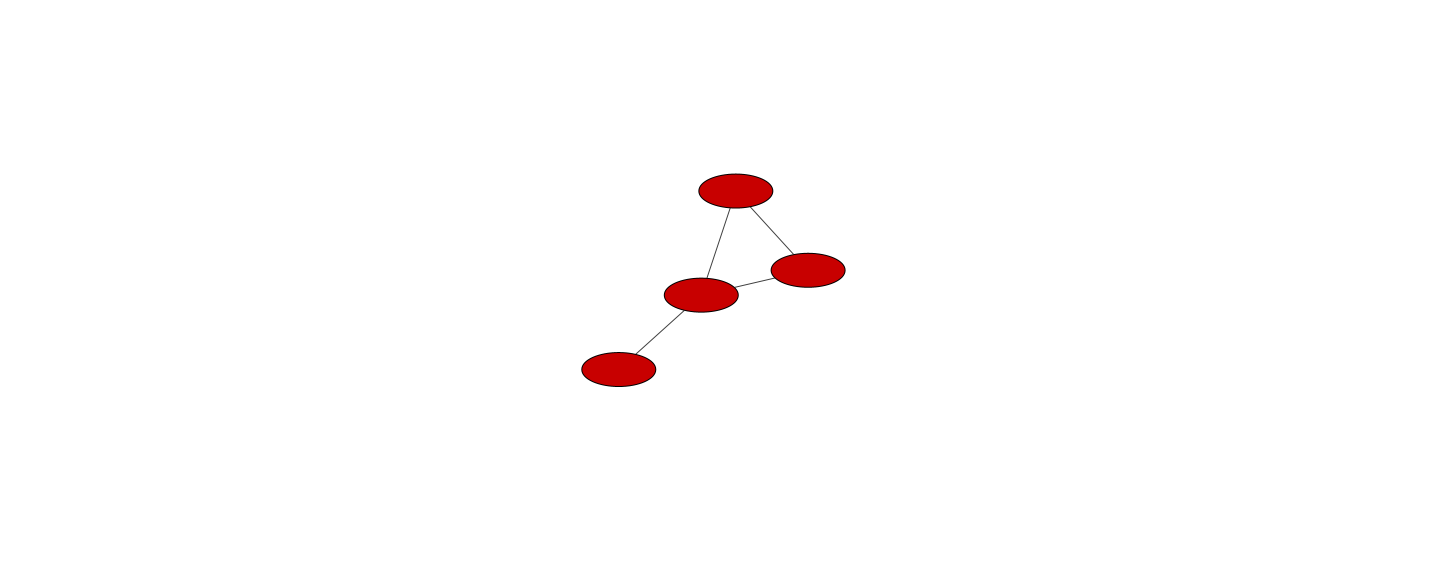

In [2]:
p4c.cytoscape_ping()
p4c.cytoscape_version_info()
nodes = pd.DataFrame(data={'id': ["node 0","node 1","node 2","node 3"], 'group': ["A","A","B","B"], 'score': [20,10,15,5]})
edges = pd.DataFrame(data={'source': ["node 0","node 0","node 0","node 2"], 'target': ["node 1","node 2","node 3","node 3"], 'interaction': ["inhibits","interacts","activates","interacts"], 'weight': [5.1,3.0,5.2,9.9]})

p4c.create_network_from_data_frames(nodes, edges, title="my first network", collection="DataFrame Example")
p4c.notebook_export_show_image()


# Connecting to STRING
Now we'll test if we can connect to STRING using stringApp.


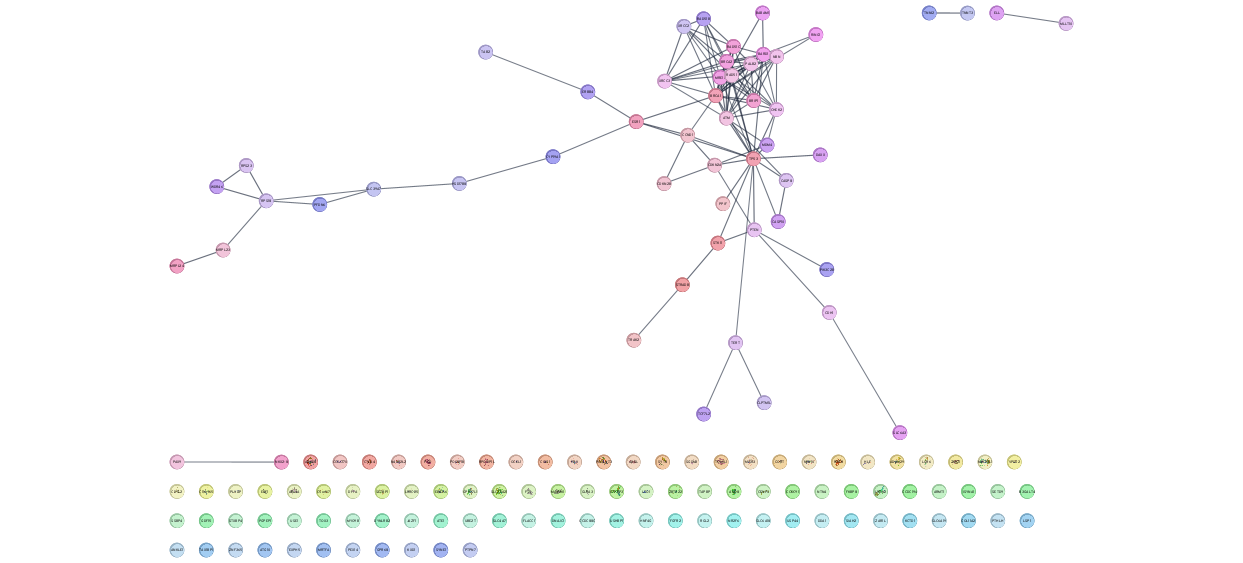

In [3]:
cmd = 'string disease query disease="breast cancer" cutoff=0.9 species="Homo sapiens" limit=150'
p4c.commands_run(cmd)
time.sleep(1)
p4c.notebook_export_show_image()

# Building glutathionylation networks
The aim is to now convert the human proteins into a network into Cytoscape. We have to:
* Create a command query for Cytoscape for each dataset
* Run the command and show the resulting network

Occasionally, an error will occur:
```
In commands_post(): Cannot invoke "org.cytoscape.view.presentation.RenderingEngine.getViewModel()" because "re" is null
```
I assume this is because the renderer hasn't been initialized yet. 
We wait for a few seconds for some cases to guard against this.

In [6]:
p4c.commands_help('string protein query')
demo = 'string protein query query="ENOA_HUMAN,ENPL_HUMAN" species="homo sapiens" limit=0 networkType="full STRING network"'
p4c.commands_run(demo)


["Loaded network 'STRING network' with 2 nodes and 1 edges"]

Defining a function that takes a pandas `Series` and turns it into a query string:

In [7]:
def series_to_query(series):
    query = ""
    protein_list = list(series.iloc[:, 0])
    for protein in protein_list:
        query = query + protein + ","
    return f'string protein query query="{query[:-1]}" species="homo sapiens" limit=0 networkType="full STRING network"'



For 2019:

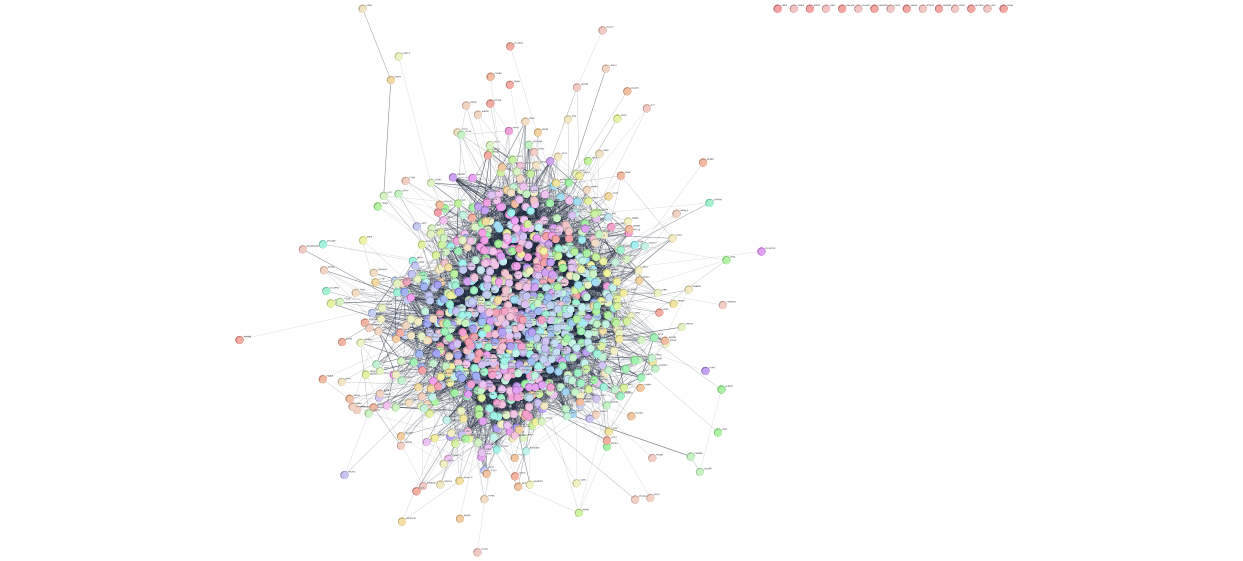

In [22]:
query2019 = series_to_query(pd.read_csv("acc_col_2019.csv"))
p4c.delete_all_networks()
p4c.commands_post(query2019)
p4c.export_network("2019network.cx", type="CX", overwrite_file=True)
p4c.notebook_export_show_image()

For 2020:

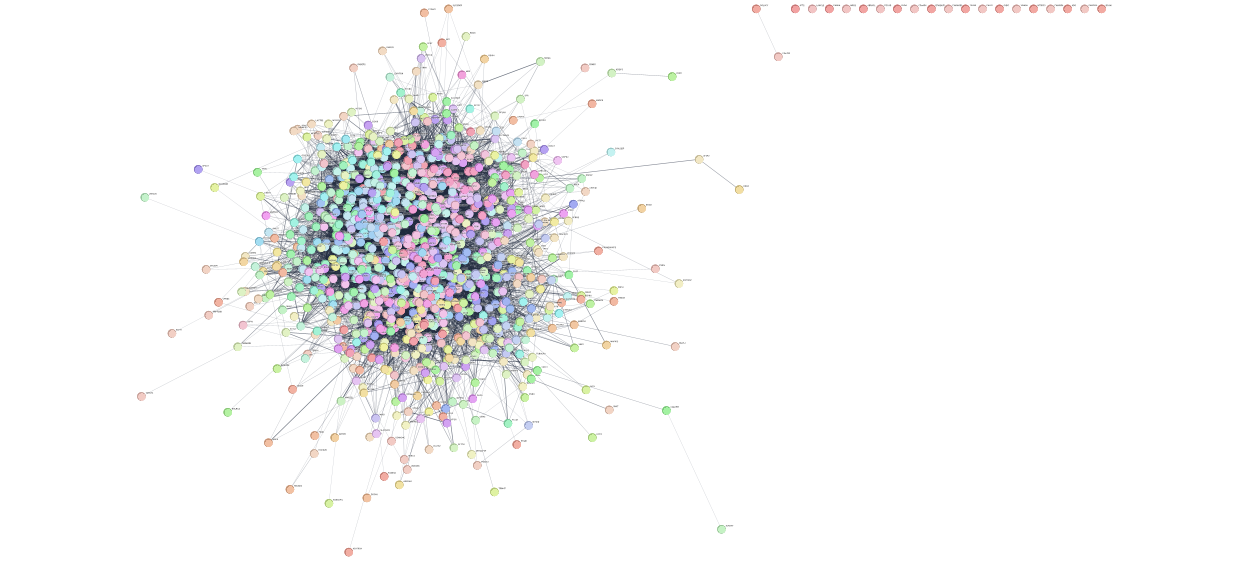

In [24]:
query2020 = series_to_query(pd.read_csv("acc_col_2020.csv"))
query2020
p4c.delete_all_networks()
p4c.commands_post(query2020)
p4c.export_network("2020network.cx", type="CX", overwrite_file=True)
p4c.notebook_export_show_image()

For 2021:

In [14]:
query2021 = series_to_query(pd.read_csv("acc_col_2021.csv"))
query2021

'string protein query query="GSTM7_HUMAN,HD_HUMAN,ENV2_HUMAN,ALDOA_HUMAN,S39AD_HUMAN,PYC_HUMAN,IDHP_HUMAN,PRDX6_HUMAN,THIL_HUMAN,VDAC1_HUMAN,MYH10_HUMAN,SODC_HUMAN,RS21_HUMAN,TLN1_HUMAN,MYH4_HUMAN,FHL1_HUMAN,PLOD2_HUMAN,SCRN2_HUMAN,AL1B1_HUMAN,FLNA_HUMAN,VMA5A_HUMAN,CSRP1_HUMAN,HINT1_HUMAN,RS2_HUMAN,ESTD_HUMAN,ALDOA_HUMAN,UBA1Y_HUMAN,PDC6I_HUMAN,ANXA6_HUMAN,GRP75_HUMAN,BCAM_HUMAN,RLA0_HUMAN,HDGF_HUMAN,AT2A2_HUMAN,AT1A1_HUMAN,P5CS_HUMAN,TCPA_HUMAN,PLXB2_HUMAN,PSME2_HUMAN,MDHC_HUMAN,SYEP_HUMAN,ERLN2_HUMAN,SYEP_HUMAN,ATP5H_HUMAN,PPID_HUMAN,LDHA_HUMAN,PPIA_HUMAN,AN32A_HUMAN,CCHL_HUMAN,HSDL1_HUMAN,CTR1_HUMAN,TPIS_HUMAN,THOP1_HUMAN,ENOA_HUMAN,BUB3_HUMAN,PLOD3_HUMAN,FKBP4_HUMAN,AGRL2_HUMAN,NUCL_HUMAN,PLOD1_HUMAN,KCC2D_HUMAN,HEM2_HUMAN,MDHM_HUMAN,SLK_HUMAN,HA1K_HUMAN,PGK1_HUMAN,1433Z_HUMAN,GNAI2_HUMAN,PCBP2_HUMAN,SRSF1_HUMAN,RL10_HUMAN,MYL4_HUMAN,GUAA_HUMAN,TBB2A_HUMAN,RS3_HUMAN,SPTB1_HUMAN,PSME2_HUMAN,EIF4EBP1_HUMAN,MYPC3_HUMAN,PYRG1_HUMAN,DYHC1_HUMAN,LRRF1_HUMAN,ELOC_HUMAN,TBB6_HUMAN,PSD13_H

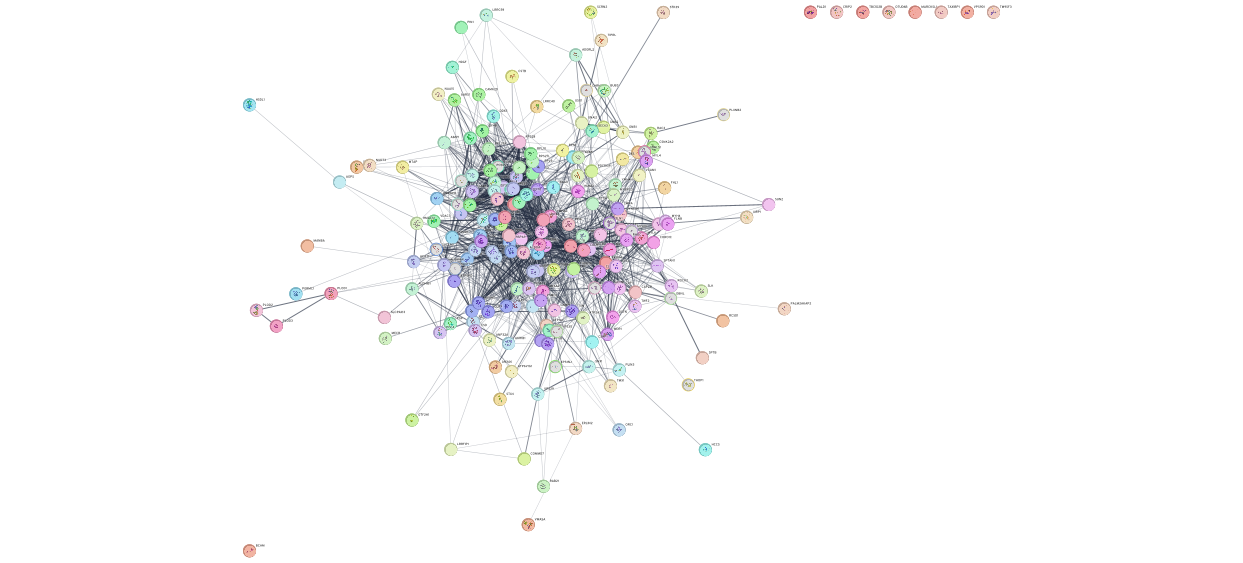

In [25]:
p4c.delete_all_networks()
p4c.commands_post(query2021)
time.sleep(2)
p4c.export_network("2021network.cx", type="CX", overwrite_file=True)
p4c.notebook_export_show_image()

For 2023:

In [17]:
query2023 = series_to_query(pd.read_csv("acc_col_2023.csv"))
query2023

'string protein query query="G3V010_HUMAN,TOM40_HUMAN,RRAGC_HUMAN,TCPH_HUMAN,A0A1W2P6P1_HUMAN,AP2A1_HUMAN,F6V084_HUMAN,PGP_HUMAN,MTNB_HUMAN,OVCA2_HUMAN,SRRT_HUMAN,SGTA_HUMAN,LCAP_HUMAN,A0A1W2P7I5_HUMAN,IMDH2_HUMAN,TMX1_HUMAN,Z4YJV4_HUMAN,PRP8_HUMAN,ARF4_HUMAN,TXN4A_HUMAN,PFD3_HUMAN,A0A0G2JGI1_HUMAN,O08797_HUMAN,A0A0R4J0Q5_HUMAN,COQ5_HUMAN,A0A0G2JDF8_HUMAN,E9QA63_HUMAN,IDHG1_HUMAN,A0A571BF93_HUMAN,RL7L_HUMAN,F8WJI6_HUMAN,LMNB2_HUMAN,A0A3Q4EI12_HUMAN,G3UZX1_HUMAN,COPG1_HUMAN,ARF5_HUMAN,A0A0A6YXS4_HUMAN,F7ACR9_HUMAN,HNRPM_HUMAN,Q3TIR6_HUMAN,A0A452J8C1_HUMAN,MESD_HUMAN,E9Q798_HUMAN,A0A0A0MQA6_HUMAN,A2AMW0_HUMAN,CAPZB_HUMAN,D9J302_HUMAN,FLNA_HUMAN,A2AIW9_HUMAN,FBRL_HUMAN,DDX1_HUMAN,A0A0N4SW31_HUMAN,A0A0N4SV00_HUMAN,D3Z629_HUMAN,COPA_HUMAN,ARPC5_HUMAN,F6ZGI7_HUMAN,ECHA_HUMAN,F7CAZ6_HUMAN,A0A0G2JFD8_HUMAN,A0A0G2JEX1_HUMAN,LIS1_HUMAN,GTR1_HUMAN,D9J300_HUMAN,B1ARU4_HUMAN,Q9DAV6_HUMAN,E9QNP1_HUMAN,A0A1W2P727_HUMAN,MPPA_HUMAN,ANXA3_HUMAN,H31_HUMAN,HYEP_HUMAN,A0A571BGC6_HUMAN,F6Q750_HUMAN,MACF1_HU

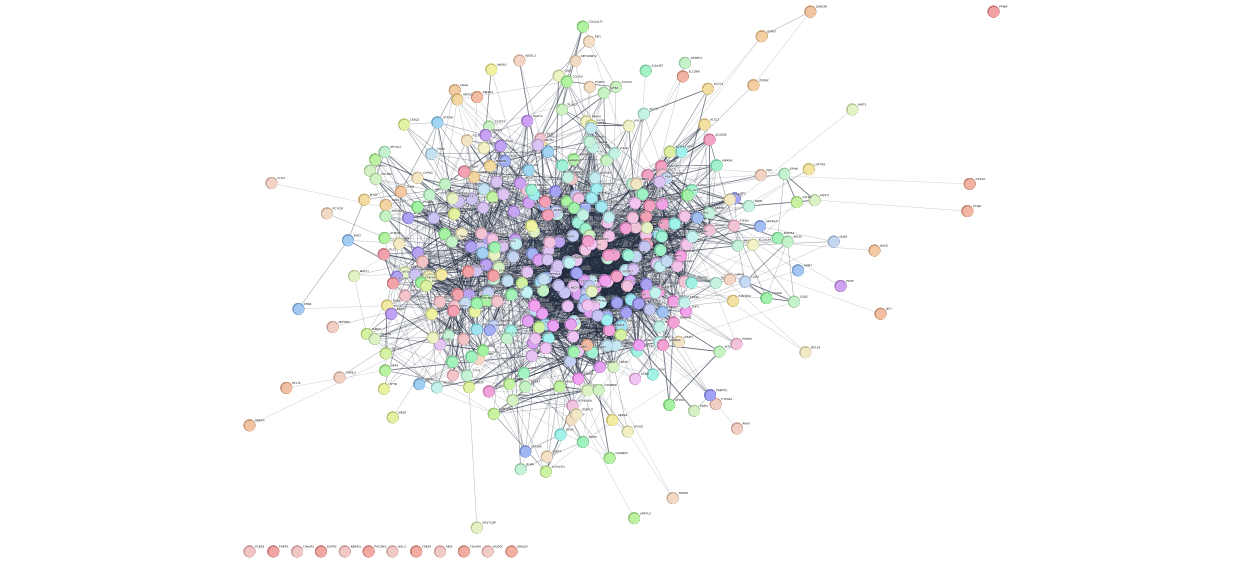

In [26]:
p4c.delete_all_networks()
p4c.commands_post(query2023)
time.sleep(2)
p4c.export_network("2023network.cx", type="CX", overwrite_file=True)
p4c.notebook_export_show_image()

# Merging networks
Now that we've generated the networks for each paper involved in glutathionylation, we can now create networks utilizing the STRING database. 
We can generate complex networks for proteins involved in certain pathways/disease, such as cardiomyopathy, and merge these into our preexisting networks.

In [7]:
def query_by_disease(disease):
    return f'string disease query disease="{disease}" cutoff=0.9 species="Homo sapiens" limit=150'

## For 2019:

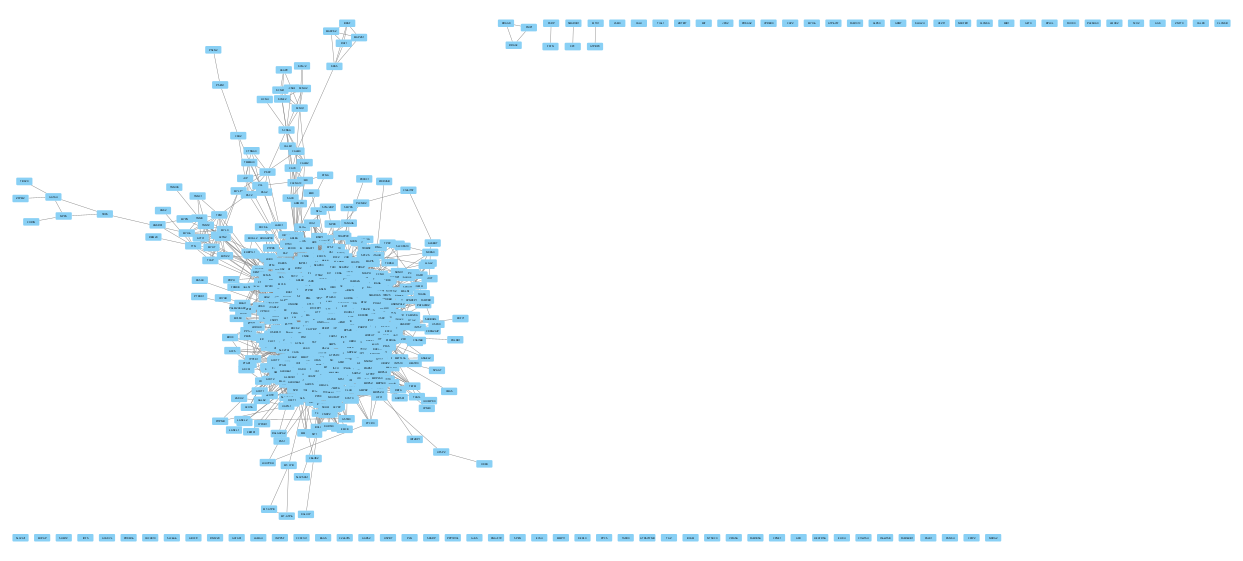

In [9]:
p4c.delete_all_networks()
p4c.import_network_from_file("2019network.cx")
p4c.commands_post(query_by_disease("cardiomyopathy"))
p4c.merge_networks(sources=p4c.get_network_list(), operation="union")
p4c.notebook_export_show_image()
# p4c.merge_networks()

## For 2020:

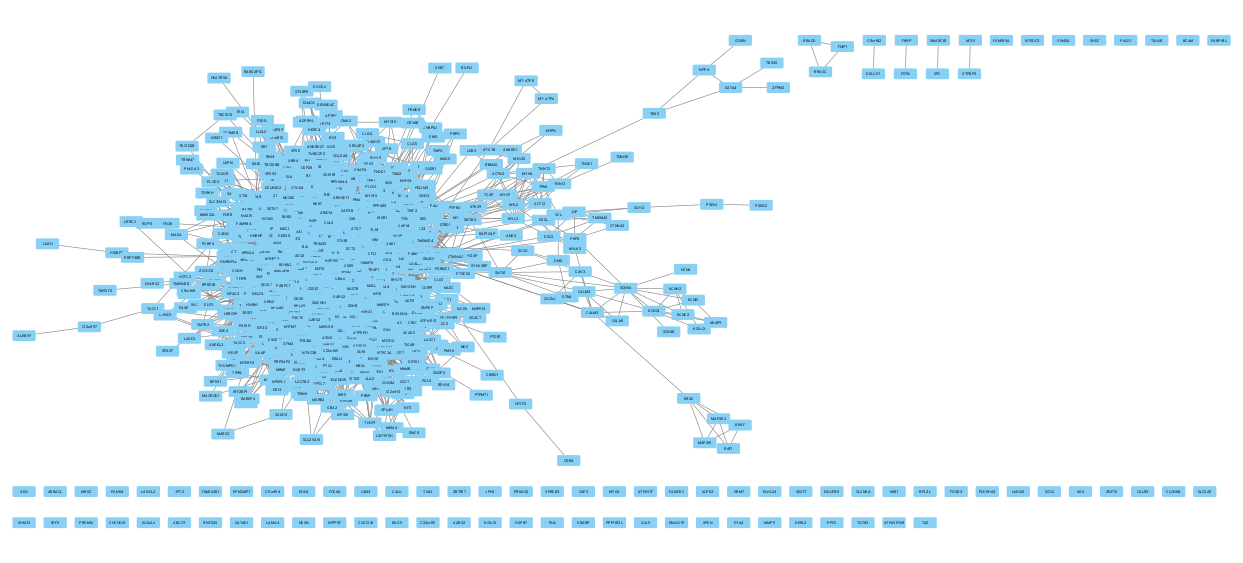

In [10]:
p4c.delete_all_networks()
p4c.import_network_from_file("2020network.cx")
p4c.commands_post(query_by_disease("cardiomyopathy"))
p4c.merge_networks(sources=p4c.get_network_list(), operation="union")
p4c.notebook_export_show_image()

## For 2021:

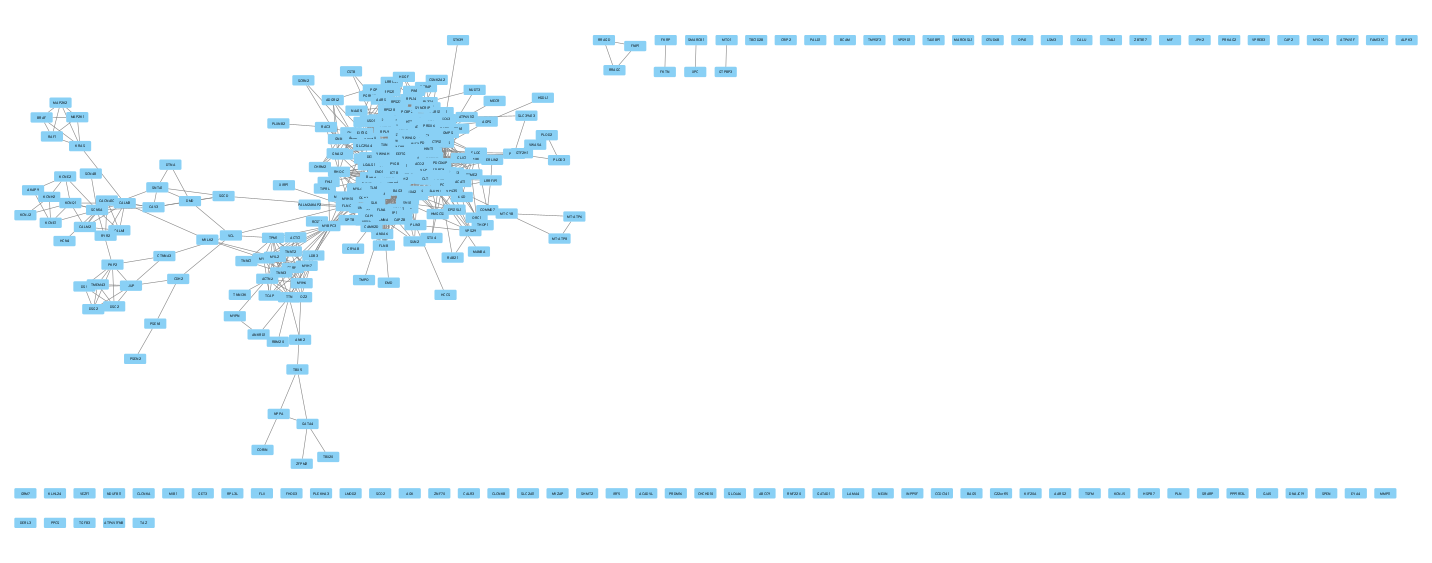

In [11]:
p4c.delete_all_networks()
p4c.import_network_from_file("2021network.cx")
p4c.commands_post(query_by_disease("cardiomyopathy"))
p4c.merge_networks(sources=p4c.get_network_list(), operation="union")
p4c.notebook_export_show_image()

## For 2023:

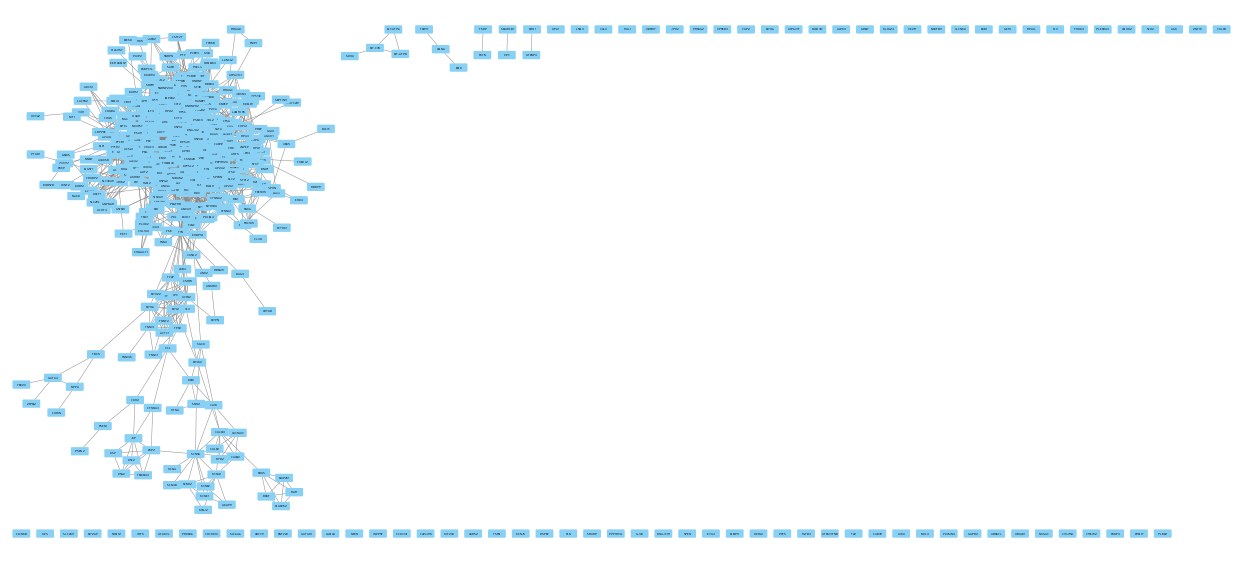

In [12]:
p4c.delete_all_networks()
p4c.import_network_from_file("2023network.cx")
p4c.commands_post(query_by_disease("cardiomyopathy"))
p4c.merge_networks(sources=p4c.get_network_list(), operation="union")
p4c.notebook_export_show_image()

# Results
The merging process was successful, based on joining the graphs through union.
# Next steps
* Implementing a Docker based API in Flask and a headless version of Cytoscape to generate SVG's and `.cyjs` files programmatically